** visualisation**

In [ ]:
#dependencies
library(ggplot2)
library(dplyr)
library(readxl)
library(GenomicRanges)
library(rtracklayer)

In [1]:
### loading significant tDMRs from each scenario
resq1 <- read.table("resq1.txt", header = TRUE, sep = "\t") 
resq2<- read.table("resq2.txt", header = TRUE, sep = "\t")
resq3 <- read.table("resq3.txt", header = TRUE, sep = "\t")
resq4<- read.table("resq4.txt", header = TRUE, sep = "\t")
resq5 <- read.table("resq5.txt", header = TRUE, sep = "\t")
resq6<- read.table("resq6.txt", header = TRUE, sep = "\t")
resq7 <- read.table("resq7.txt", header = TRUE, sep = "\t")
resq8<- read.table("resq8.txt", header = TRUE, sep = "\t")
resq75 <- read.table("resq7_0.05.txt", header = TRUE, sep = "\t")
resq85<- read.table("resq8_0.05.txt", header = TRUE, sep = "\t")

test<-resq7
dim(test)
head(test)
sum(test[,8]<0.05)

[1] 2336    8

,DMRnumber,chr,st,end,intercept,f,pval,qval
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,7478,chr20,60751975,60752320,2.1519394,38.33832,2.804548e-07,0.001854872
2,12381,chr17,5882814,5883013,2.0168519,36.42646,4.623939e-07,0.001854872
3,11235,chr1,25472270,25472754,0.3109544,33.73726,9.559373e-07,0.002034627
4,4140,chr9,139414758,139415013,0.8740158,32.83552,1.227302e-06,0.002034627
5,12168,chr17,37887321,37887546,0.5769506,32.71863,1.268011e-06,0.002034627
6,7490,chr20,32716846,32717096,3.2589058,28.36667,4.456243e-06,0.005958671


[1] 242

In [11]:
# tissue specific markers
top1000 <- read_excel("C:/Users/Hiam/Desktop/DNA methylation atlas of normal human cell types/S4C_TOP1000.xlsx", sheet = 1) 
mine<-test
mine$st<-mine$st - 50
mine$end<-mine$end + 50
gr1 <- GRanges(seqnames = mine$chr,
               ranges = IRanges(start = mine$st, end = mine$end),
               beta = mine$qval)
atlas<-top1000
gr2 <- GRanges(seqnames = atlas$chr,
               ranges = IRanges(start = atlas$start, end = atlas$end),
               beta = atlas$Diff) 
overlaps <- findOverlaps(gr1, gr2)
common_regions <- pintersect(gr1[queryHits(overlaps)], gr2[subjectHits(overlaps)])
overlap_indices <- subjectHits(overlaps)
overlapping_rows <- top1000[overlap_indices, ]
dim(data.frame(overlapping_rows))
head(data.frame(overlapping_rows))

New names:
• `` -> `...15`


[1] 19 16

,Type,chr,start,end,startCpG,endCpG,position,Number.of.CpGs,Length,Target.meth.,Background.meth.,Diff,Genomic.class,Gene,...15,p.value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<dbl>
1,Colon-Ep:Small-Int-Ep,chr5,177680703,177680994,8991799,8991814,chr5:177680703-177680994,15CpGs,291bp,0.0932,0.927,0.8338,intron,COL23A1,NA,NA
2,Endothel,chr8,99309382,99309625,12968991,12969000,chr8:99309382-99309625,9CpGs,243bp,0.0970,0.763,0.6660,Intergenic,NIPAL2,NA,NA
3,Gastric-Ep:Small-Int-Ep,chr1,1065900,1066249,18151,18166,chr1:1065900-1066249,15CpGs,349bp,0.0139,0.706,0.6921,Intergenic,LOC254099,NA,NA
4,Pancreas-Duct,chr10,134471997,134472211,15952337,15952352,chr10:134471997-134472211,15CpGs,214bp,0.1680,0.922,0.7540,intron,INPP5A,NA,NA
5,Blood-Granul,chr3,47122329,47122886,4852006,4852018,chr3:47122329-47122886,12CpGs,557bp,0.1540,0.950,0.7960,intron,SETD2,NA,NA
6,Colon-Ep:Gastric-Ep:Small-Int-Ep,chr1,6031033,6031239,132418,132424,chr1:6031033-6031239,6CpGs,206bp,0.0142,0.730,0.7158,intron,NPHP4,NA,NA


In [ ]:
#Integrating different cell type from each tissue
cell_types <- c(
  "Adipocytes", "Bladder-Ep", "Blood-B", "Blood-Granul", "Blood-Mono+Macro", "Blood-NK", "Blood-T",
  "Bone-Osteob", "Breast-Basal-Ep", "Breast-Basal-Ep:Breast-Luminal-Ep", "Breast-Luminal-Ep",
  "Colon-Ep", "Colon-Ep:Gastric-Ep:Small-Int-Ep", "Colon-Ep:Small-Int-Ep", "Colon-Fibro",
  "Colon-Fibro:Heart-Fibro", "Dermal-Fibro", "Endothel", "Epid-Kerat", "Eryth-prog", "Fallopian-Ep",
  "Fallopian-Ep:Ovary-Ep", "Gallbladder", "Gastric-Ep", "Gastric-Ep:Small-Int-Ep", "Head-Neck-Ep",
  "Heart-Cardio", "Heart-Cardio:Heart-Fibro", "Heart-Cardio:Skeletal-Musc:Smooth-Musc", "Heart-Fibro",
  "Kidney-Ep", "Liver-Hep", "Lung-Ep-Alveo", "Lung-Ep-Alveo:Lung-Ep-Bron", "Lung-Ep-Bron", "Neuron",
  "Neuron:Oligodend", "Oligodend", "Ovary-Ep", "Pancreas-Acinar", "Pancreas-Alpha",
  "Pancreas-Alpha:Pancreas-Beta:Pancreas-Delta", "Pancreas-Beta", "Pancreas-Delta", "Pancreas-Duct",
  "Prostate-Ep", "Skeletal-Musc", "Skeletal-Musc:Smooth-Musc", "Small-Int-Ep", "Smooth-Musc",
  "Thyroid-Ep")
overlapping_rows$Organ <- sub("-.*", "", overlapping_rows$Type)
head(overlapping_rows)
dim(overlapping_rows)                          

Type,chr,start,end,startCpG,endCpG,position,Number of CpGs,Length,Target meth.,Background meth.,Diff,Genomic class,Gene,...15,p-value,Organ
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<dbl>,<chr>
Blood-Granul,chr17,74324646,74325212,23170589,23170603,chr17:74324646-74325212,14CpGs,566bp,0.3650,0.942,0.5770,intron,PRPSAP1,NA,NA,Blood
Pancreas-Acinar,chr10,116190310,116190874,15722673,15722678,chr10:116190310-116190874,5CpGs,564bp,0.0421,0.882,0.8399,TTS,ABLIM1,NA,NA,Pancreas
Pancreas-Delta,chr20,20420912,20421185,25265507,25265512,chr20:20420912-20421185,5CpGs,273bp,0.1420,0.822,0.6800,intron,RALGAPA2,NA,NA,Pancreas
Pancreas-Acinar,chr1,155167099,155167572,1433009,1433022,chr1:155167099-155167572,13CpGs,473bp,0.0998,0.910,0.8102,exon,THBS3,NA,NA,Pancreas
Skeletal-Musc,chr8,139735754,139735883,13272296,13272301,chr8:139735754-139735883,5CpGs,129bp,0.3690,0.806,0.4370,intron,COL22A1,NA,NA,Skeletal
Heart-Cardio,chr5,1946637,1946709,7597414,7597419,chr5:1946637-1946709,5CpGs,72bp,0.0604,0.824,0.7636,Intergenic,IRX4,NA,NA,Heart


[1] 12 17

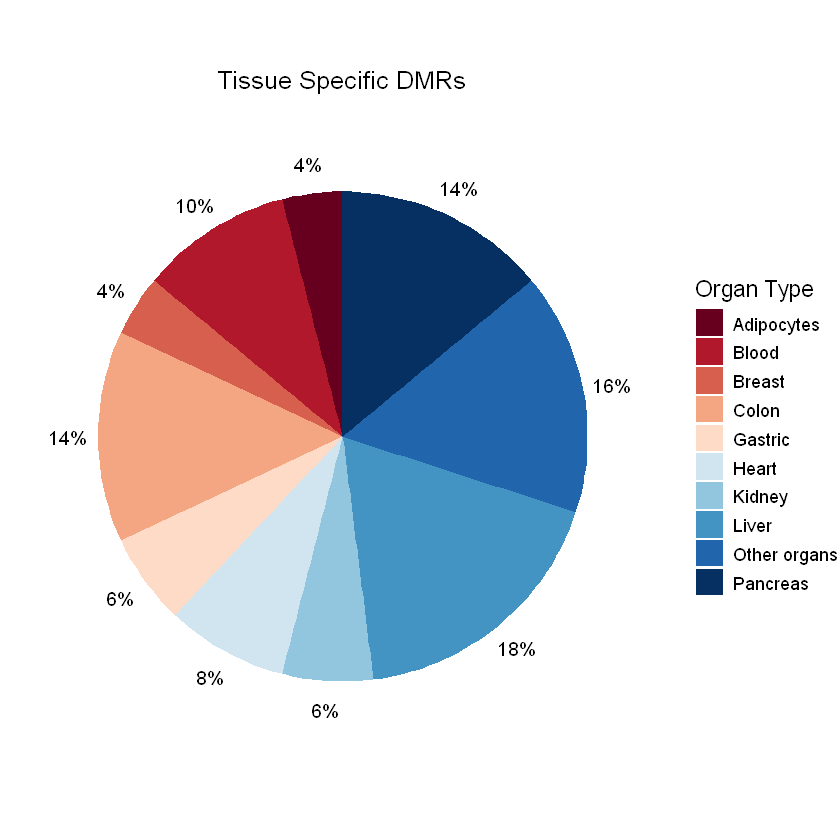

In [125]:
# Calculating percentages of each tissue
organ_counts_df <- organ_counts_df %>%
  mutate(
    Percentage = Count / sum(Count) * 100,
    perc_text = paste0(round(Percentage, 1), "%")) # label text with percentage

# Ranking and combining top 10 organs
top_organ_df <- organ_counts_df %>%
  arrange(desc(Percentage)) %>%
  mutate(Organ = ifelse(row_number() <= 10, as.character(Organ), "Other organs")) %>%
  group_by(Organ) %>%
  summarise( Count = sum(Count), 
    Percentage = sum(Percentage), 
    perc_text = paste0(round(Percentage, 1), "%") )

# Pie chart
ggplot(top_organ_df, aes(x = "", y = Percentage, fill = Organ)) +
  geom_bar(width = 1, stat = "identity", show.legend = TRUE) + 
  coord_polar(theta = "y") + # Polar coordinates for a pie chart
  geom_text(aes(x = 1.62, label = perc_text), # Moving labels farther from the center
            size = 4, position = position_stack(vjust = 0.5), color = "black") + 
  scale_fill_brewer(palette = "RdBu", labels = unique(top_organ_df$Organ)) + 
  labs(
    title = "Tissue Specific DMRs", 
    x = "", 
    y = ""
  ) +
  guides( fill = guide_legend(title = "Organ Type", nrow = length(unique(top_organ_df$Organ)), byrow = FALSE)
  ) +
  theme_void() + 
  theme(plot.title = element_text(size = 15, hjust = 0.5),
    legend.position = "right", 
    legend.text = element_text(size = 11), 
    legend.title = element_text(size = 14),
    strip.text = element_text(size = 15) )

#ggsave("pie_chart_75.png", plot = last_plot(), width = 8, height = 6, dpi = 300)


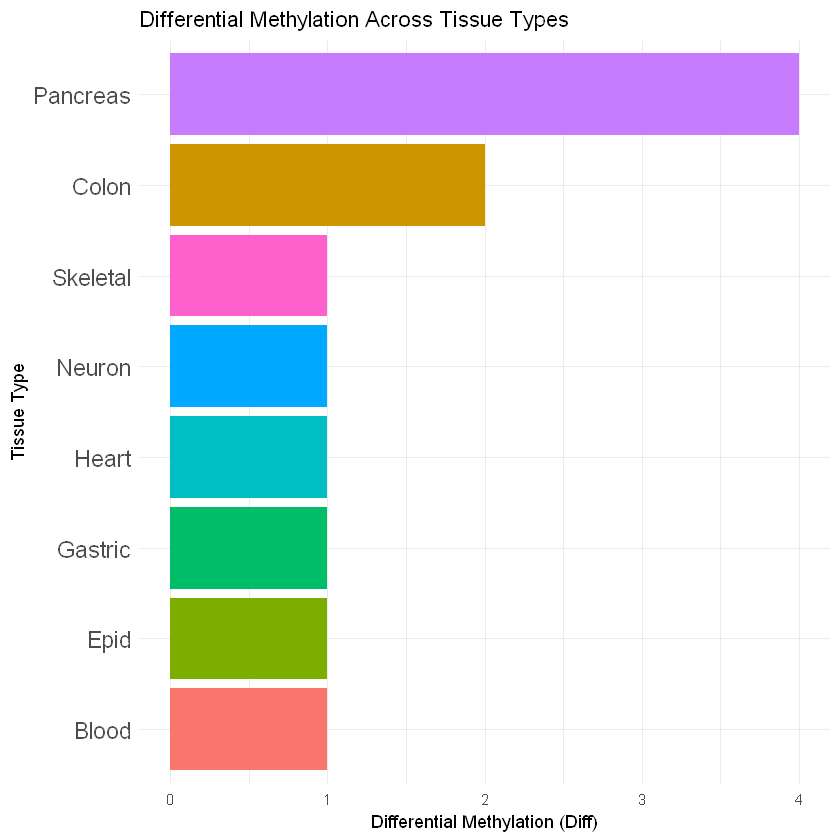

In [ ]:

organ_counts <- table(overlapping_rows$Organ)
organ_counts_df <- as.data.frame(organ_counts)
colnames(organ_counts_df) <- c("Organ", "Count")
# Bar plot
ggplot(organ_counts_df, aes(x = reorder(Organ, Count), y = Count, fill = Organ)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  coord_flip() + 
  labs(
    title = "Differential Methylation Across Tissue Types",
    x = "Tissue Type",
    y = "Differential Methylation (Diff)"
  ) +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 14))  
